In [51]:
import pandas as pd 
import numpy as pn

In [52]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [53]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Transformacion de datos


In [55]:
df_data['TotalCharges'] = pd.to_numeric(df_data['TotalCharges'],errors='coerce')

## valores nulos


In [56]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [57]:
df_data.dropna(inplace=True)

## Elimando features

In [58]:
df_data.drop(axis=1, columns=['customerID'],inplace=True)

In [59]:
df_data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2410,Female,0,Yes,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,80.45,3398.90,No
6398,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),106.00,7723.70,Yes
909,Female,0,No,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,111.25,7984.15,No
3463,Male,0,No,No,37,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.15,3369.25,No
3428,Male,1,Yes,No,51,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.80,4750.95,Yes


In [60]:
df_data['Churn'].replace('No',0,inplace=True)
df_data['Churn'].replace('Yes',1,inplace=True)

In [61]:
df_data_processing = df_data.copy()

In [62]:
df_data_processing = pd.get_dummies(df_data_processing,drop_first=True)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### Elimando mas feature para obtener un mejor acurracy

In [118]:
df_data_processing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

## Correlaciones

TypeError: 'int' object is not callable

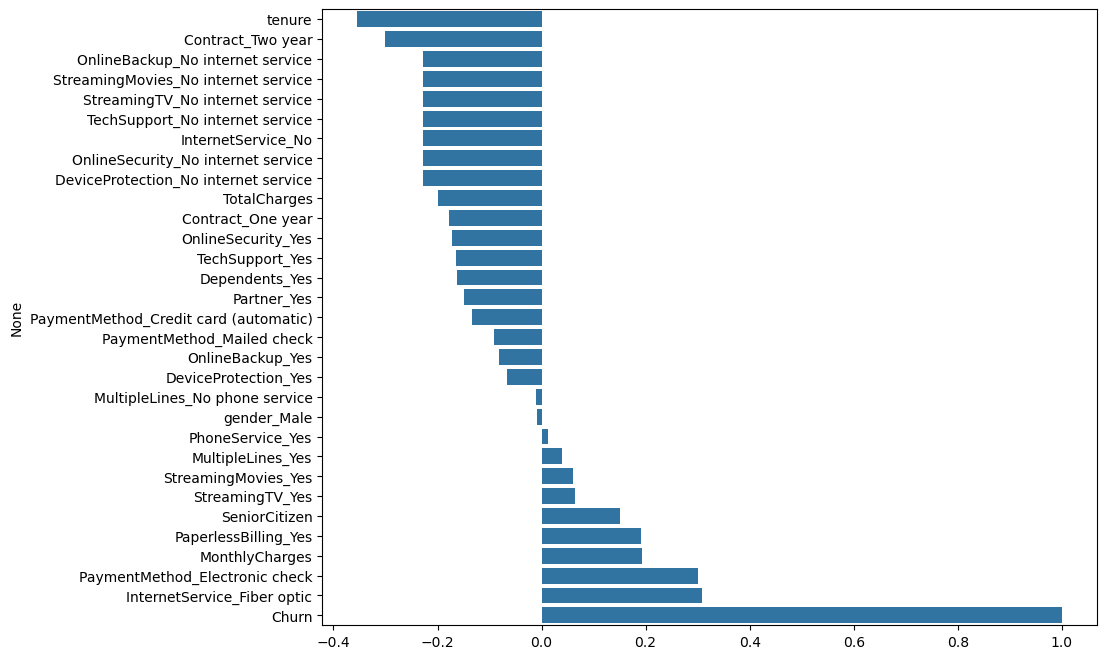

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que df_data_processing está definido y contiene la columna 'Churn'
# df_data_processing = ...

# Calcula las correlaciones y ordénalas
correlations = df_data_processing.corr()['Churn'].sort_values(ascending=True)

# Crea un gráfico de barras con Seaborn
fig = plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)

# Configura la rotación de las etiquetas del eje x
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()


## Escalando los datos

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()
df_data_processing_scaled = scaler.fit_transform(df_data_processing)

In [66]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [67]:
df_data_processing_scaled.columns = df_data_processing.columns

In [68]:
df_data_processing_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## EDA

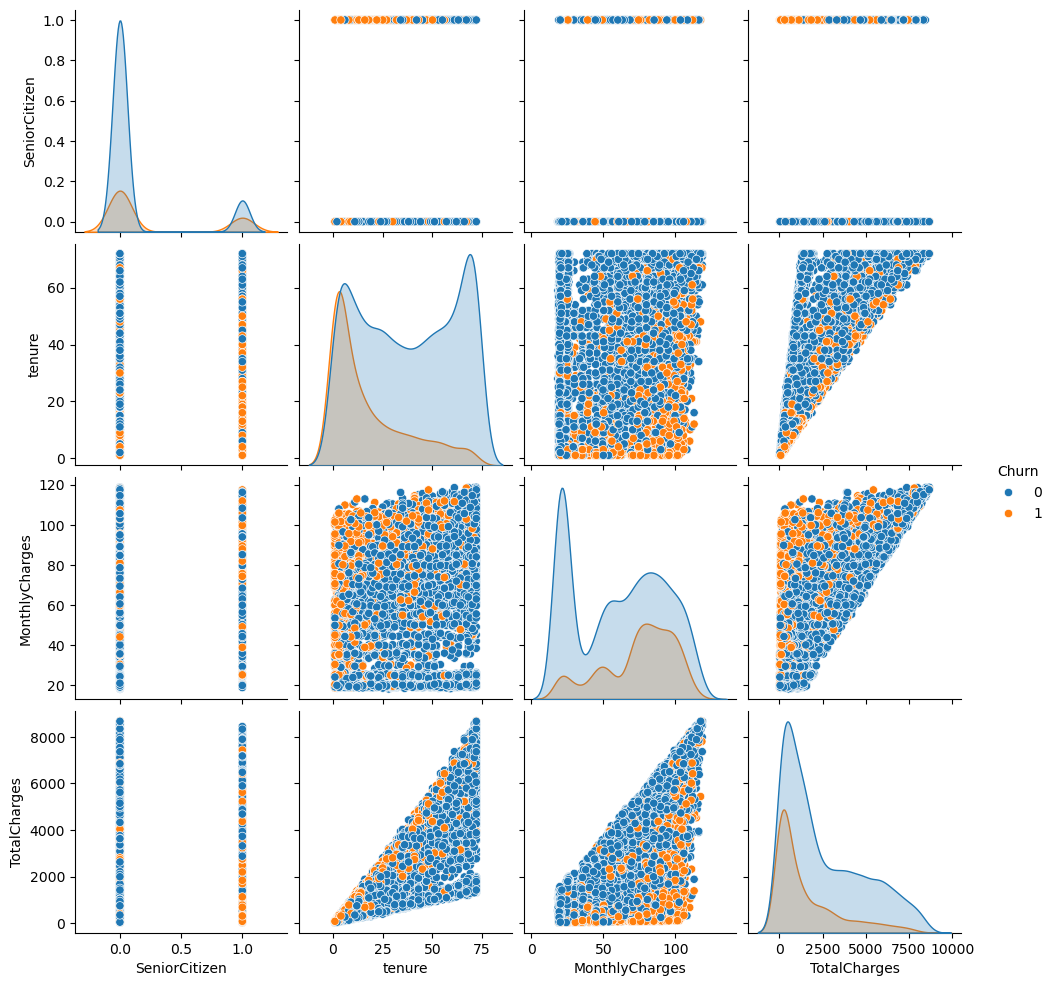

In [73]:
sns.pairplot(
    data=df_data,
    hue='Churn')

<Axes: xlabel='gender', ylabel='count'>

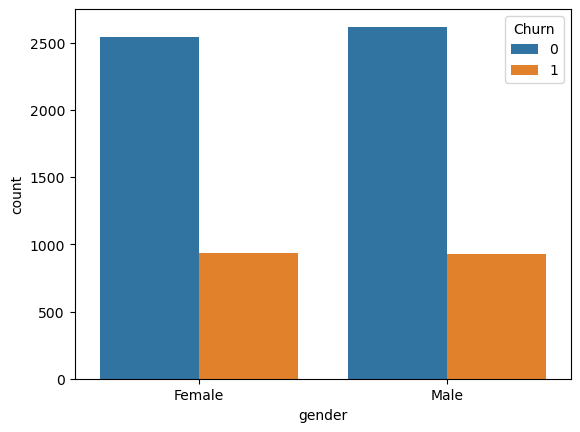

In [87]:
sns.countplot(
    data=df_data,
    x='gender',
    hue='Churn'
)

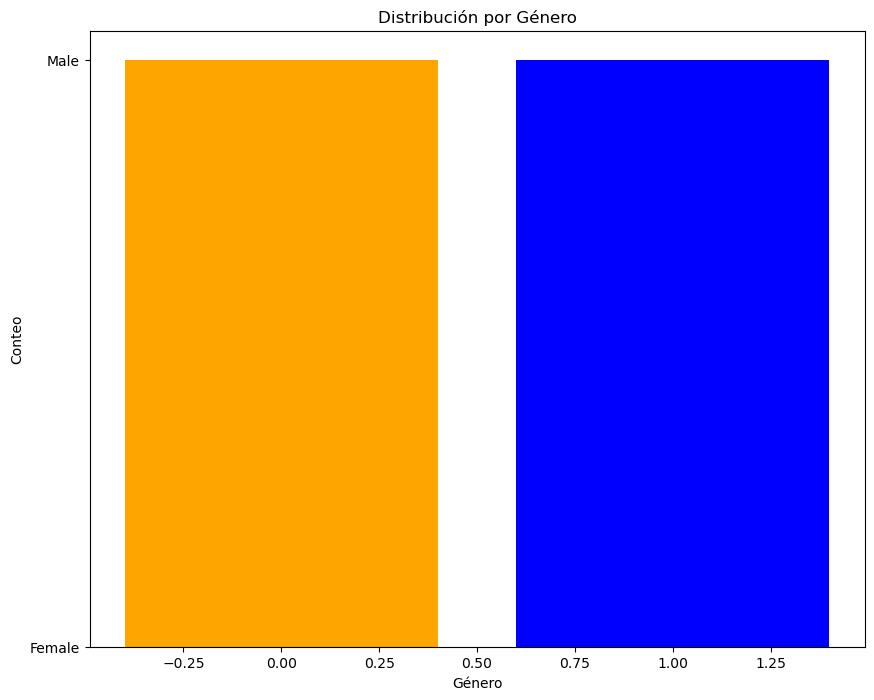

In [86]:
fig, ax= plt.subplots(figsize=(10,8))

ax.bar(
    x = df_data['Churn'],
    height = df_data['gender'],
    color=['blue', 'orange']
)
ax.set_xlabel('Género')
ax.set_ylabel('Conteo')
ax.set_title('Distribución por Género')
plt.show()

In [74]:
df_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


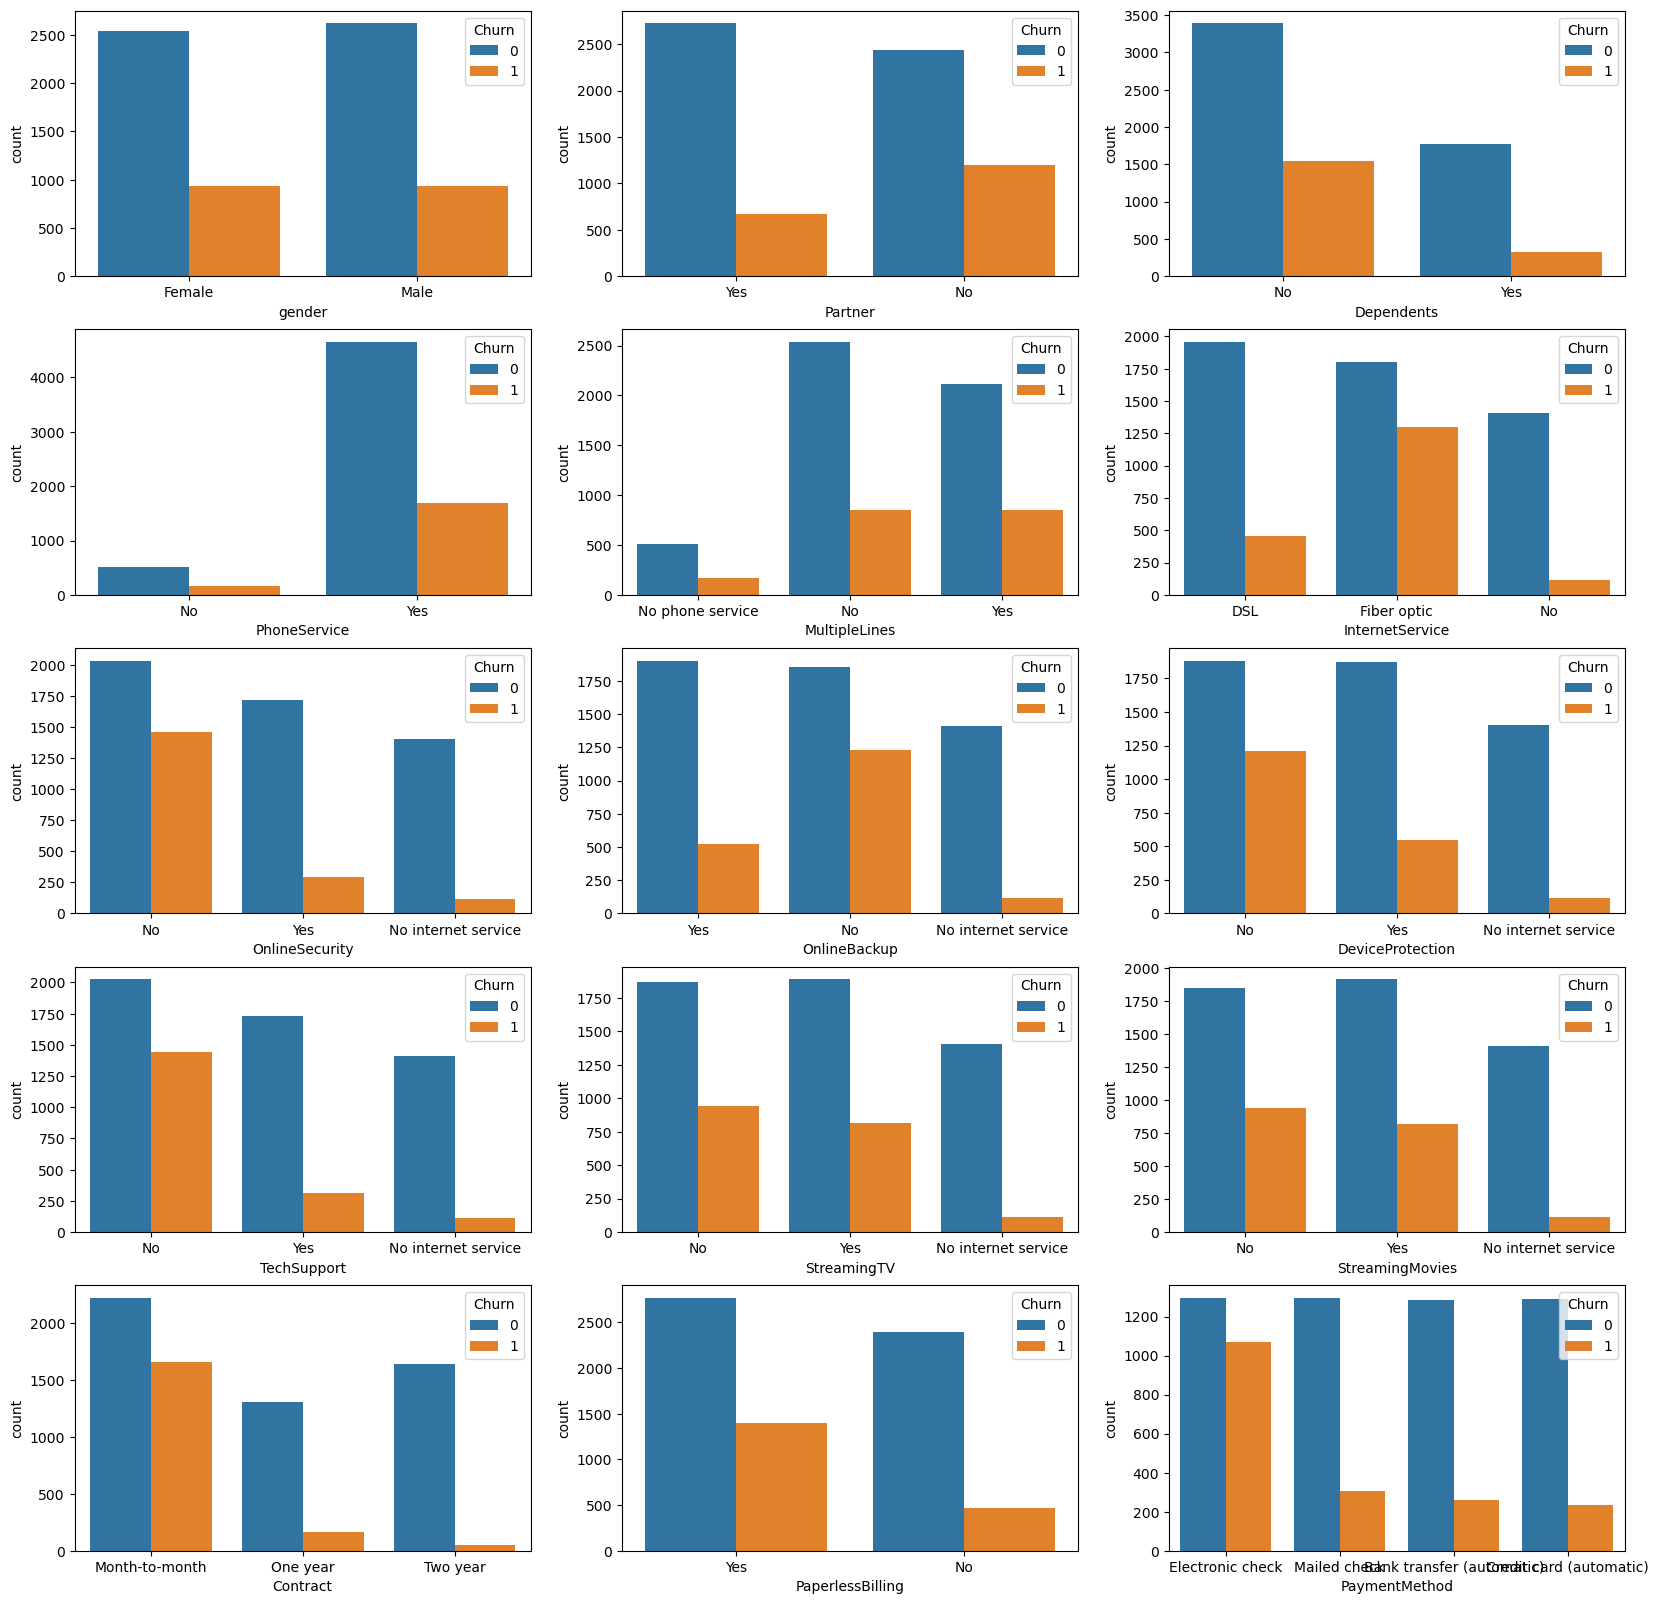

In [88]:
columns_cat = df_data.select_dtypes(include='object').columns

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for var, ax in zip(columns_cat, axs.flatten()):
    sns.countplot(data=df_data, x=var,hue='Churn', ax=ax)

### Entranamiento del modelo

In [89]:
X = df_data_processing_scaled.drop('Churn',axis=1)
Y = df_data_processing_scaled['Churn'].values

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.30,random_state=42) 

In [98]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit (X_train,Y_train)

LogisticRegression()

### Evalucion del modelo 

In [102]:

from sklearn import metrics
prediction_test = model.predict(X_test)

print(metrics.accuracy_score(Y_test,prediction_test ))

0.795734597156398


### Otra forma de hacerlo

In [104]:
model.score(X_test,Y_test)

0.795734597156398

### Probabilidad de predicion del modelo

*Esta es la probablida para de cada feature predicion de que sea 1 o 0* 

In [105]:
model.predict_proba(X_test)

array([[0.9900733 , 0.0099267 ],
       [0.86260748, 0.13739252],
       [0.30246025, 0.69753975],
       ...,
       [0.99015604, 0.00984396],
       [0.70085651, 0.29914349],
       [0.82812473, 0.17187527]])

### Nivel de importancia de cada feature del df que prediga el valor 

*Esto vas desde el que mayor tiene positivamente al que mas tiene negativamente*

In [106]:
model.coef_

array([[ 0.22035058, -3.12507861, -0.10677561,  1.20430842, -0.0231496 ,
         0.1211656 , -0.25563979, -0.22952716,  0.21292584,  0.21033512,
         0.91161368, -0.11549255, -0.11549255, -0.38784332, -0.11549255,
        -0.07610719, -0.11549255, -0.02221961, -0.11549255, -0.35122839,
        -0.11549255,  0.258926  , -0.11549255,  0.26175833, -0.82099263,
        -1.37880107,  0.20788667, -0.15752054,  0.21943162, -0.07633099]])

### Importancia de cada feature
*Es muy similar al anterior pero en este caso son la columnas*

In [107]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

Axes(0.125,0.11;0.775x0.77)


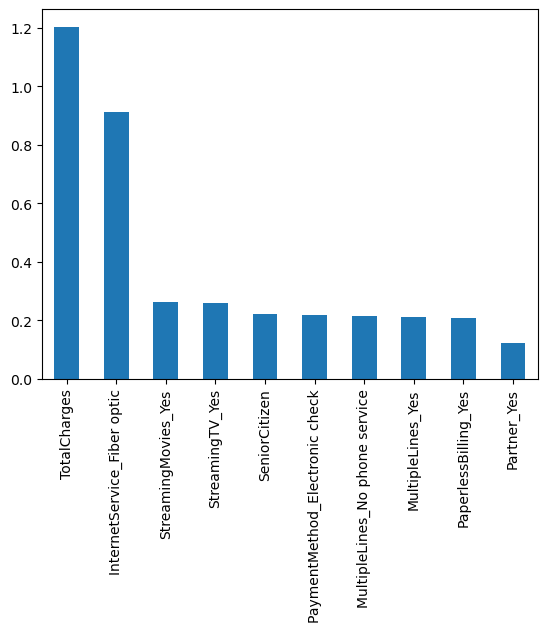

In [108]:
weights = pd.Series(
    model.coef_[0],
    index = X.columns.values
)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


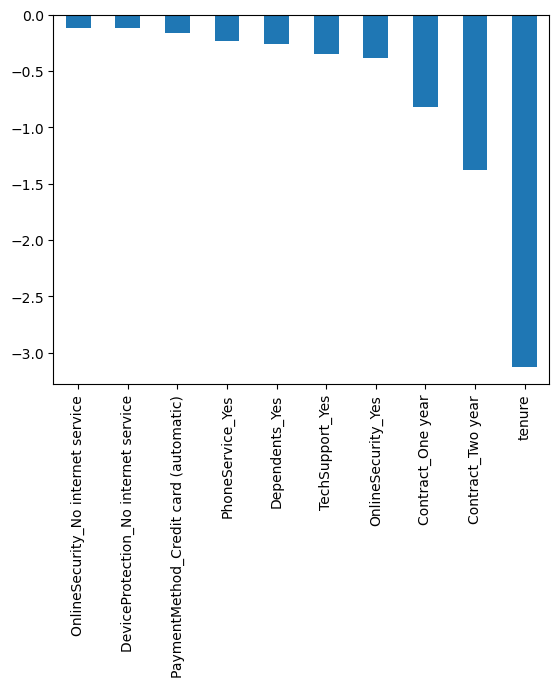

In [109]:
weights = pd.Series(
    model.coef_[0],
    index = X.columns.values
)
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

### Matrix de confusion

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

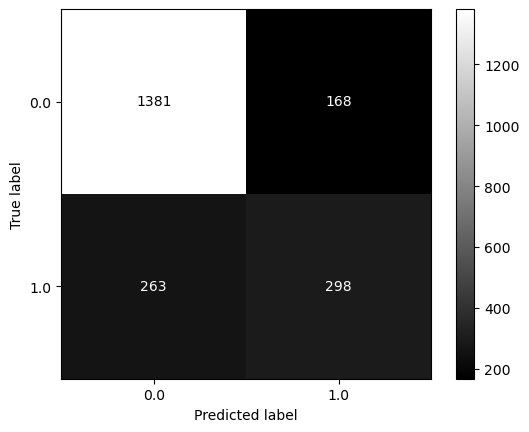

In [111]:
cm = confusion_matrix(Y_test, prediction_test, labels=model.classes_)
disp =ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

La matrix de confusion lo que determina que cantidad de valores que eran 1 los predijo como 1 y lo que eran 0 los predijo como 0 y viceversa